# Week 4


# Customer Segmentation: RFM

#### Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

**WHY SEGMENTATION?**

- It helps in identifying your best and worst customers.
- It helps create more customer-oriented strategies for the company.
- It improves customer relationships through a better understanding of their needs.
- It can show the advantages and disadvantages of the business and products.
- It can help create new products and improve old ones based on customer needs.
- It improves customer service.
- Upsell and cross-sell other products and services.

### Customer Segmentation using RFM analysis

RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary). RFM analysis is based on the marketing axiom that "80% of your business comes from 20% of your customers."

![](docs/rfm.png)

Image from: https://clevertap.com/blog/rfm-analysis/

For this analysis we will use the data set we studied last week on [Find the preprocessing steps here.](https://github.com/LilitYolyan/customer_behavior_analysis/blob/master/Week_2_Data_Preparation_and_EDA.ipynb)

### RFM segmentation

In the previous analysis, we found out that we have order level data, which means that we have multiple orders from the same customer at the same date and time. In the first step of RFM analysis, we need to transform our dataset to the customer level, where each row represents information about one customer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline


In [2]:
# Dataset
data = pd.read_csv('data_cleaned.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,OrderHour,OrderMonth,OrderWeekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,12,2


In [3]:
# Create customer level dataset
dt = data.groupby(['CustomerID', 'InvoiceDate'], as_index=False)['TotalPrice'].sum()
dt.head()

,CustomerID,InvoiceDate,TotalPrice
0,12347.0,2010-12-07 14:57:00,711.79
1,12347.0,2011-01-26 14:30:00,475.39
2,12347.0,2011-04-07 10:43:00,636.25
3,12347.0,2011-06-09 13:01:00,382.52
4,12347.0,2011-08-02 08:48:00,584.91


In [4]:
dt['InvoiceDate'] = pd.to_datetime(dt['InvoiceDate'])
print("The last date in our dataset: ", dt.InvoiceDate.max())
now = datetime.datetime(2011,12,10)
print('The last date to count recency: ', now)

The last date in our dataset:  2011-12-09 12:50:00
The last date to count recency:  2011-12-10 00:00:00


- **For Recency**, Calculate the number of days between present date and date of last purchase each customer.
- **For Frequency**, Calculate the number of orders for each customer.
- **For Monetary**, Calculate sum of purchase price for each customer.

In [5]:
rfm= dt.groupby('CustomerID').agg({'InvoiceDate': lambda date: (now - date.max()).days,
                                        'CustomerID': 'count',
                                        'TotalPrice': 'sum'})

In [6]:
rfm.columns=['recency', 'frequency', 'monetary',]
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,recency,frequency,monetary
0,12347.0,2,7,4310.00
1,12348.0,75,4,1437.24
2,12349.0,18,1,1457.55
3,12350.0,310,1,294.40
4,12352.0,36,7,1385.74


In [7]:
rfm.describe()

,CustomerID,recency,frequency,monetary
count,4334.000000,4334.000000,4334.000000,4334.000000
mean,15300.053992,92.226119,4.227503,1957.232338
std,1721.427757,100.158382,7.585860,8462.296686
min,12347.000000,0.000000,1.000000,2.900000
25%,13813.250000,17.000000,1.000000,305.560000
50%,15298.500000,50.000000,2.000000,666.875000
75%,16778.750000,142.000000,5.000000,1628.202500
max,18287.000000,373.000000,207.000000,279138.020000


If we look closer to the table above, we can notice that up to 0.5 quantiles of the frequency variable are equal to 1. To conduct RFM analysis, the main base of segmenting customers is quantiles, which cannot be done in the "frequency" column. To solve this problem, we will have 3 groups: up to 0.5 quantiles, from 0.5 to 0.75, from 0.75 to 1.

**RFM features**

/home/lilit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Recency')

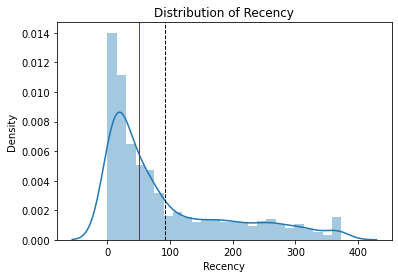

In [8]:
sns.distplot(rfm.recency)
plt.axvline(rfm.recency.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(rfm.recency.median(), color='r', linewidth=1)
plt.title('Distribution of Recency')
plt.xlabel("Recency")

Here, we can see that we have right skewness in distribution. The median is somewhere around 55. Therefore we can make two assumptions:

1. Many customers recently made their first purchase
2. On average, customers return within 55 days.

Most likely, in the skewed edge of the distribution are customers who churn.

/home/lilit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Frequency')

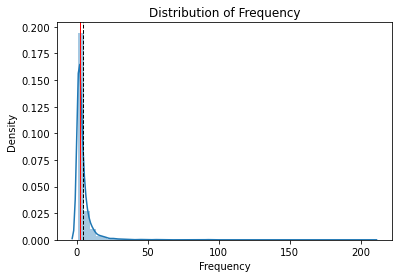

In [9]:
sns.distplot(rfm.frequency)
plt.axvline(rfm.frequency.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(rfm.frequency.median(), color='r', linewidth=1)
plt.title('Distribution of Frequency')
plt.xlabel("Frequency")

Again, we have high skewness here. Only few customers purchased often than 50 times. On average, customers make purchases only twice in a lifetime.

/home/lilit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Monetary value')

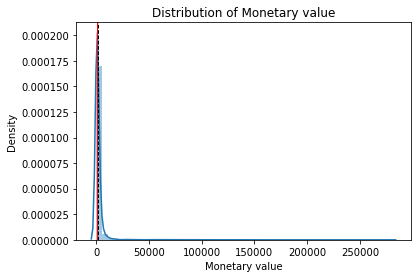

In [10]:
sns.distplot(rfm.monetary)
plt.axvline(rfm.monetary.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(rfm.monetary.median(), color='r', linewidth=1)
plt.title('Distribution of Monetary value')
plt.xlabel("Monetary value")

Like frequency values, some customers spend large amount of money on our products, however on average customers spend 666 pounds per order.

**Computing Quantile of RFM values**

In [11]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
# In the frequency column, we manually change the quantiles to solve the problem described above.
rfm['f_quartile'] = pd.qcut(rfm['frequency'], [0, .5, .75,  1], ['3', '2', '1']) 
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [12]:
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,12347.0,2,7,4310.00,1,1,1
1,12348.0,75,4,1437.24,3,2,2
2,12349.0,18,1,1457.55,2,3,2
3,12350.0,310,1,294.40,4,3,4
4,12352.0,36,7,1385.74,2,1,2


**RFM Result Interpretation**

In [13]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,12347.0,2,7,4310.00,1,1,1,111
1,12348.0,75,4,1437.24,3,2,2,322
2,12349.0,18,1,1457.55,2,3,2,232
3,12350.0,310,1,294.40,4,3,4,434
4,12352.0,36,7,1385.74,2,1,2,212


/home/lilit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 largest segments')

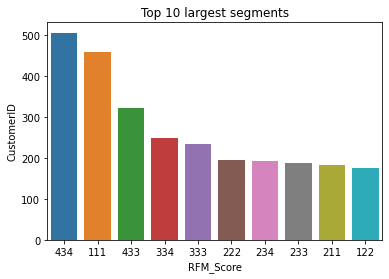

In [14]:
results = rfm.groupby('RFM_Score', as_index=False).CustomerID.count().sort_values('CustomerID', ascending=False)

tops = results.head(10)
sns.barplot(tops.RFM_Score, tops.CustomerID)
plt.title('Top 10 largest segments')

We have very interesting results. As you can see, the two largest segments are our best and worst segments. On the one hand, we have a lot of loyal customers who are willing to spend more money on our products(111), and on the other hand, we have a large group of customers who have the shortest lifespan and are likely to churn soon.(434).
<br>
<br>

This information can be used by managers, marketers and salespeople to improve their actions in a more customer-centric way.
<br>
<br>
Food for thought, what other assumptions can we make about this segmentation? 